In [1]:
import numpy as np
import os
#Visualizations
import matplotlib.pyplot as plt
import random
from datetime import datetime

import helperFunc as hf

## Functions

In [2]:
def plotQHistProgression(QMany,taus,color,filePath = False):
    
    maxY = 0.26
    plt.rcParams['figure.figsize'] = [30,5]
    numIterations = QMany.shape[0]
    numHist = QMany.shape[1]
    wt = np.ones(numIterations) /numIterations
    print('num of iterations is '+str(numIterations))
    plt.style.use('seaborn-deep')
    for j in np.arange(numHist):
        plt.subplot(1,numHist,j+1)
        plt.xlim([0.05,0.8])
        plt.ylim([0,maxY])
        plt.hist(QMany[:,j],bins = 15,weights=wt,color = color,edgecolor='black', linewidth=1)
        plt.plot([np.mean(QMany[:,j]),np.mean(QMany[:,j])],[0,maxY],color = 'red',linewidth=2)
        tx = 'mean is '+str(np.mean(QMany[:,j]))
        print(tx)
        plt.xlabel('Q')
        plt.ylabel('Pr(Q)')
        ttl = 'tau = '+str(np.float32(taus[j]))
        plt.title(ttl)
        
    
    if filePath is not False:
        directory = os.path.dirname(filePath)
        if not os.path.exists(directory):  # makes the directory if it does not exist
            os.makedirs(directory)
        plt.savefig(filePath,format='eps', dpi=1200) 


In [3]:
def getMatrixFromDict(dataAll,tausAll,tausSelect):
    
    tausAll = np.asarray(tausAll)
    iterations = dataAll.shape[2]
    dataSelect = np.zeros((iterations,len(tausSelect)))

    for ind,t in enumerate(tausSelect):
        indSelectTau = np.where(tausAll==t)[0][0]
        dataSelect[:,ind] = dataAll[0,indSelectTau,:]

    return dataSelect

## Load Q and manipulate the dict to get the Q matrix that you want and plot them

In [4]:
#parameters tested
rewirings = 4000
pRand = [0.2]

directoryQLoad ='data/ModularityValues/1000iterationsHist/'
weightDist = ['normal','lognormal']

QLoadPath,Q,QSelect,taus = {},{},{},{}
for p in pRand:
    for wD in weightDist:
        QLoadPath[(wD,p)] = directoryQLoad + 'Q_'+wD+'_p'+str(p)+'.pckl'
        (Q[(wD,p)],taus[(wD,p)]) = hf.loadVar(QLoadPath[(wD,p)])
        QSelect[(wD,p)] = getMatrixFromDict(Q[(wD,p)],taus[(wD,p)],taus[(wD,p)])
        

num of iterations is 1000
mean is 0.6311643597960835
mean is 0.5690154720655016
mean is 0.4588530213091905
mean is 0.3448596816762216
mean is 0.2740268907714747
****************
Normal Networks
****************


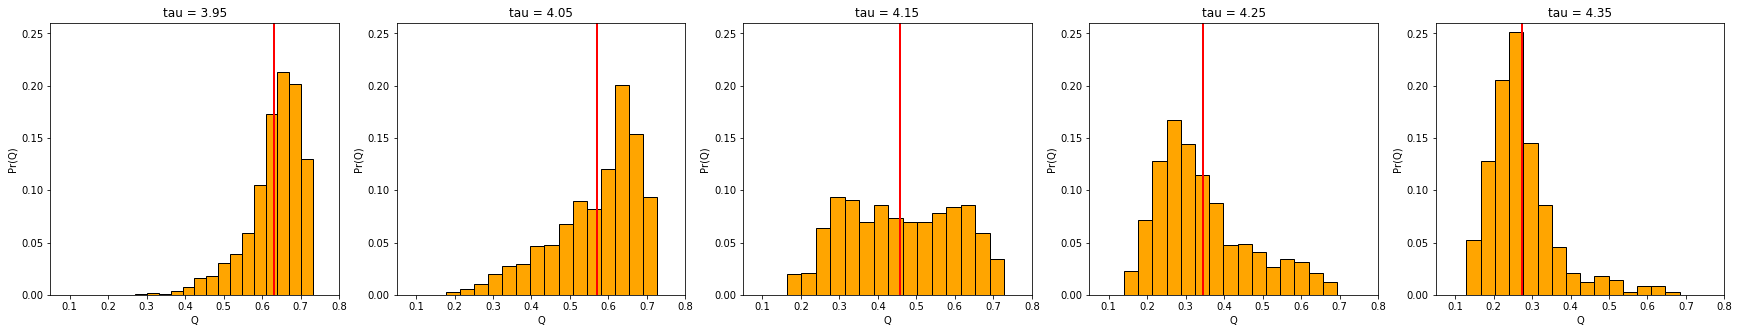

In [5]:
filePathPlot = False
plotQHistProgression(QSelect[('normal',0.2)],taus['normal',0.2],'orange',filePathPlot)
print('****************')
print('Normal Networks')
print('****************')


num of iterations is 1000
mean is 0.5320248143032211
mean is 0.5126539734385072
mean is 0.4979983484016569
mean is 0.4771874461142035
mean is 0.45205236342841987
******************
LogNormal Networks
******************


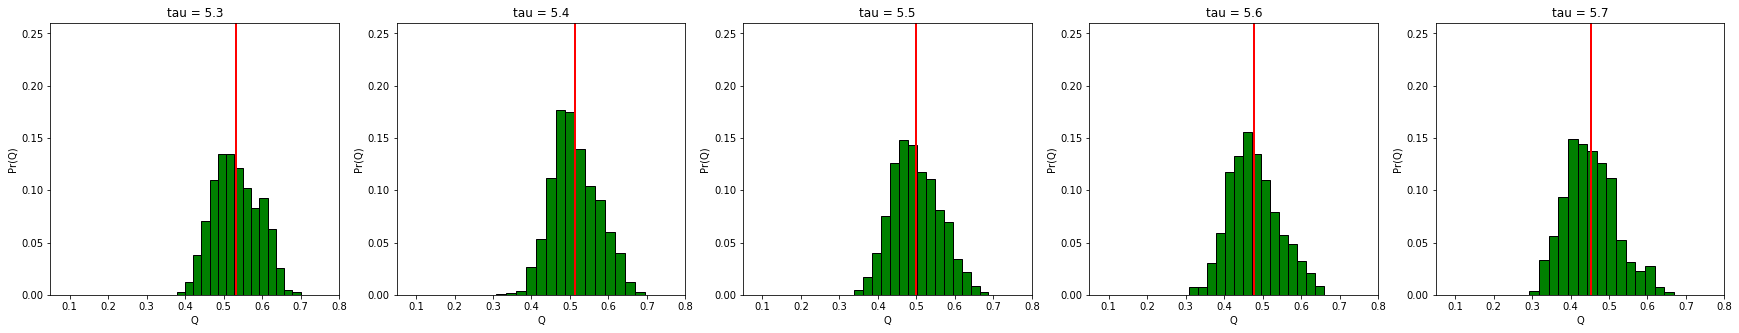

In [6]:
filePathPlot = False
plotQHistProgression(QSelect[('lognormal',0.2)],taus['lognormal',0.2],'g',filePathPlot)
print('******************')
print('LogNormal Networks')
print('******************')